In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import json

f = open('/content/gdrive/MyDrive/twitter-data1.json',)
data = json.load(f)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(data)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,Mon Jul 19 07:13:44 +0000 2021,1417019812522336264,1417019812522336264,"@itsmeurmine Rumah, uang 1 M, terus saham BBRI...",False,"[13, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.417009e+18,1417008557682167812,1.363419e+18,1363418597368864771,itsmeurmine,"{'id': 1068459980662071296, 'id_str': '1068459...",None,None,None,None,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN
1,Mon Jul 19 07:03:49 +0000 2021,1417017314797441025,1417017314797441025,"BBRI Penuh Prospek Positif, Cek Analisa Ini ht...",False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://www.detik.com/"" rel=""nofollow""...",NaN,None,NaN,None,None,"{'id': 847372542830444544, 'id_str': '84737254...",None,None,None,None,False,1,0,False,False,in,False,NaN,NaN,NaN,NaN
2,Mon Jul 19 05:48:39 +0000 2021,1416998399019130884,1416998399019130884,@imdepan Saham bbri 1 lot aja,False,"[9, 29]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.416739e+18,1416739126716497925,1.231598e+18,1231598481787146241,imdepan,"{'id': 983398639002378242, 'id_str': '98339863...",None,None,None,None,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN
3,Mon Jul 19 05:32:19 +0000 2021,1416994287758110721,1416994287758110721,Rights Issue BBRI dan Masa Depan Holding Ultra...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://investor.id"" rel=""nofollow"">I...",NaN,None,NaN,None,None,"{'id': 238091066, 'id_str': '238091066', 'name...",None,None,None,None,False,0,0,False,False,in,False,"{'media': [{'id': 1416994285799444481, 'id_str...",NaN,NaN,NaN
4,Mon Jul 19 04:11:27 +0000 2021,1416973937553002498,1416973937553002498,@Saham_fess Bbri 👉👈,False,"[12, 19]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.416973e+18,1416973105243643907,1.336580e+18,1336580251493646343,Saham_fess,"{'id': 580717185, 'id_str': '580717185', 'name...",None,None,None,None,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Sun Jul 11 15:52:42 +0000 2021,1414251309373411331,1414251309373411331,Jihan 10 lot BBRI cukup ga? WKWKWKWK,False,"[0, 36]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1336831684549828608, 'id_str': '1336831...",None,None,None,None,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN
254,Sun Jul 11 14:18:31 +0000 2021,1414227609483763712,1414227609483763712,Salah satu bos PT BRI Agroniaga Tbk (AGRO (JK:...,False,"[0, 177]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1380881912630177799, 'id_str': '1380881...",None,None,None,None,False,0,0,False,False,in,False,"{'media': [{'id': 1414227575807741956, 'id_str...",NaN,NaN,NaN
255,Sun Jul 11 09:04:07 +0000 2021,1414148488804380672,1414148488804380672,Analisa Bandarmology Saham 9/7/2021 IHSG ( BBR...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_l

In [ ]:
words_list = df['full_text'].values.tolist()
print(words_list)

['@itsmeurmine Rumah, uang 1 M, terus saham BBRI 1000 lot apalagi ya 😌 udah itu aja.', 'BBRI Penuh Prospek Positif, Cek Analisa Ini https://t.co/z0ysFBl0fL', '@imdepan Saham bbri 1 lot aja', 'Rights Issue BBRI dan Masa Depan Holding Ultramikro https://t.co/XQhI62WIwf https://t.co/QKIjhsZnjG', '@Saham_fess Bbri 👉👈', 'Lali enek barang nde $BMRI $BBRI $DMAS saking males e ndelok market $IHSG sing bearish wkwkwkk 🤣', 'Selamat hari Senin, Smart People!\n\nHari ini Sahamin dan tim riset RHB akan membahas analisa fundamental untuk saham Unilever UNVR dan analisa teknikal BBRI, ICBP, TINS. Rekomendasinya BUY atau SELL ya? \n\nYuk, simak disini RHB Smart Talk 19 Juli 2021 https://t.co/YqI9NNtLeH', 'Shm! Bbri RI kapan ya?', 'bbri w nyangkut mele dah mao sebulan', 'ikut pesen ipo bukalapak dulu yak sambil nunggu rupslb bbri. nunggu jdwl right issue semoga stlh bulalapak melantai 😁', 'BBRI kapan naiknya? :(', 'oke bbri. kemana mau dibawa kita? https://t.co/ivxmiAqt2v', 'Buyback saham BBRI\nhttps:/

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
 
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

clean_text = df.full_text[0:]

clean_result = []
for t in clean_text:
    clean_result.append(tweet_cleaner(t))
clean_result

['rumah uang m terus saham bbri lot apalagi ya udah itu aja',
 'bbri penuh prospek positif cek analisa ini',
 'saham bbri lot aja',
 'rights issue bbri dan masa depan holding ultramikro',
 'fess bbri',
 'lali enek barang nde bmri bbri dmas saking males e ndelok market ihsg sing bearish wkwkwkk',
 'selamat hari senin smart people hari ini sahamin dan tim riset rhb akan membahas analisa fundamental untuk saham unilever unvr dan analisa teknikal bbri icbp tins rekomendasinya buy atau sell ya yuk simak disini rhb smart talk juli',
 'shm bbri ri kapan ya',
 'bbri w nyangkut mele dah mao sebulan',
 'ikut pesen ipo bukalapak dulu yak sambil nunggu rupslb bbri nunggu jdwl right issue semoga stlh bulalapak melantai',
 'bbri kapan naiknya',
 'oke bbri kemana mau dibawa kita',
 'buyback saham bbri',
 'artha sekuritas ihsg rawan koreksi rekomendasi klbf agii bbri',
 'nanakali ah are walla dazanmm ch nya agar zor bbri baqwat dabii',
 'bbri juli akum ritel jualan harga closing lagi di atas juli beso

In [ ]:
clean_df = pd.DataFrame(clean_result,columns=['full_text'])
clean_df['date'] = df.created_at

clean_df.head()

,full_text,date
0,rumah uang m terus saham bbri lot apalagi ya u...,Mon Jul 19 07:13:44 +0000 2021
1,bbri penuh prospek positif cek analisa ini,Mon Jul 19 07:03:49 +0000 2021
2,saham bbri lot aja,Mon Jul 19 05:48:39 +0000 2021
3,rights issue bbri dan masa depan holding ultra...,Mon Jul 19 05:32:19 +0000 2021
4,fess bbri,Mon Jul 19 04:11:27 +0000 2021


In [ ]:
import csv

In [ ]:
clean_df.to_csv('/content/gdrive/MyDrive/twitter-data-clean.csv',encoding='utf-8')
csv = '/content/gdrive/MyDrive/twitter-data-clean.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,full_text,date
0,rumah uang m terus saham bbri lot apalagi ya u...,Mon Jul 19 07:13:44 +0000 2021
1,bbri penuh prospek positif cek analisa ini,Mon Jul 19 07:03:49 +0000 2021
2,saham bbri lot aja,Mon Jul 19 05:48:39 +0000 2021
3,rights issue bbri dan masa depan holding ultra...,Mon Jul 19 05:32:19 +0000 2021
4,fess bbri,Mon Jul 19 04:11:27 +0000 2021


In [ ]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
my_dic = {"tdk":"tidak", "blm":"belum", "jg":"juga", "trs":"terus", "tp":"tapi",
          "rp":"rupiah", "&amp":"dan","knp":"kenapa","dst":"dan seterusnya","dg":"dengan",
          "dgn":"dengan", "dpt":"dapat", "jng":"jangan","jgn":"jangan", "kl":"kalau",
          "klo":"kalau", "yg":"yang", "trf":"transfer", "tf":"transfer", "bgt":"banget",
          "brp":"berapa", "knp":"kenapa", "jt":"juta", "lwt":"lewat", "cc":"credit card",
          "sy":"saya", "tks":"thanks", "jan":"januari", "apr":"april", "agt":"agustus",
          "sept":"september", "okt":"oktober", "nov":"november", "des":"desember",
          "utk":"untuk", "fb":"facebook", "tw":"twitter", "ig":"instagram",
          "gaminat":"ga minat", "bank bca":"", "bank bri":"", "bank mandiri":"",
          "bank danamon":"", "bali banks":"", "bca":"", "bri":"", "danamon":""}

my_pattern = re.compile(r'\b(' + '|'.join(my_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    my_handled = my_pattern.sub(lambda x: my_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", my_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

clean_text = df.full_text[0:]

clean_result = []
for t in clean_text:
    clean_result.append(tweet_cleaner_updated(t))
clean_result

my_df['clean_ft'] = clean_result

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('indonesian')

In [ ]:
my_df['no_stopwords_ft'] = my_df['clean_ft'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
my_df

,full_text,date,clean_ft,no_stopwords_ft
0,rumah uang m terus saham bbri lot apalagi ya u...,Mon Jul 19 07:13:44 +0000 2021,rumah uang terus saham bbri lot apalagi ya uda...,rumah uang saham bbri lot ya udah aja
1,bbri penuh prospek positif cek analisa ini,Mon Jul 19 07:03:49 +0000 2021,bbri penuh prospek positif cek analisa ini,bbri penuh prospek positif cek analisa
2,saham bbri lot aja,Mon Jul 19 05:48:39 +0000 2021,saham bbri lot aja,saham bbri lot aja
3,rights issue bbri dan masa depan holding ultra...,Mon Jul 19 05:32:19 +0000 2021,rights issue bbri dan masa depan holding ultra...,rights issue bbri holding ultramikro
4,fess bbri,Mon Jul 19 04:11:27 +0000 2021,bbri,bbri
...,...,...,...,...
253,jihan lot bbri cukup ga wkwkwkwk,Sun Jul 11 15:52:42 +0000 2021,jihan lot bbri cukup ga wkwkwkwk,jihan lot bbri ga wkwkwkwk
254,salah satu bos pt bri agroniaga tbk agro jk ag...,Sun Jul 11 14:18:31 +0000 2021,salah satu bos pt agroniaga tbk agro jk agro m...,salah bos pt agroniaga tbk agro jk agro memutu...
255,analisa bandarmology saham ihsg bbri agro bmhs...,Sun Jul 11 09:04:07 +0000 2021,analisa bandarmology saham ihsg bbri agro bmhs...,analisa bandarmology saham ihsg bbri agro bmhs...
256,analisa bandarmology saham ihsg bbri agro bmhs...,Sun Jul 11 05:16:21 +0000 2021,analisa bandarmology saham ihsg bbri agro bmhs...,analisa bandarmology saham ihsg bbri agro bmhs...


In [ ]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 14.4 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

tweet_stem = my_df['no_stopwords_ft'].apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))
tweet_stem

0                  rumah uang saham bbri lot ya udah aja
1                 bbri penuh prospek positif cek analisa
2                                     saham bbri lot aja
3                   rights issue bbri holding ultramikro
4                                                   bbri
                             ...                        
253                             jih lot bbri ga wkwkwkwk
254    salah bos pt agroniaga tbk agro jk agro putus ...
255    analisa bandarmology saham ihsg bbri agro bmhs...
256    analisa bandarmology saham ihsg bbri agro bmhs...
257    bumn jual gratis rugi jdi milik saham saham bb...
Name: no_stopwords_ft, Length: 258, dtype: object

In [ ]:
type(tweet_stem)

pandas.core.series.Series

In [ ]:
clean_df['full_text'] = tweet_stem
clean_df['date'] = df.created_at

clean_df

,full_text,date
0,rumah uang saham bbri lot ya udah aja,Mon Jul 19 07:13:44 +0000 2021
1,bbri penuh prospek positif cek analisa,Mon Jul 19 07:03:49 +0000 2021
2,saham bbri lot aja,Mon Jul 19 05:48:39 +0000 2021
3,rights issue bbri holding ultramikro,Mon Jul 19 05:32:19 +0000 2021
4,bbri,Mon Jul 19 04:11:27 +0000 2021
...,...,...
253,jih lot bbri ga wkwkwkwk,Sun Jul 11 15:52:42 +0000 2021
254,salah bos pt agroniaga tbk agro jk agro putus ...,Sun Jul 11 14:18:31 +0000 2021
255,analisa bandarmology saham ihsg bbri agro bmhs...,Sun Jul 11 09:04:07 +0000 2021
256,analisa bandarmology saham ihsg bbri agro bmhs...,Sun Jul 11 05:16:21 +0000 2021


In [ ]:
# my_df['stemmed_ft'] = tweet_stem
# my_df

In [ ]:
clean_df.to_csv('/content/gdrive/MyDrive/twitter-data-clean2.csv',encoding='utf-8')
csv = '/content/gdrive/MyDrive/twitter-data-clean2.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,full_text,date
0,rumah uang saham bbri lot ya udah aja,Mon Jul 19 07:13:44 +0000 2021
1,bbri penuh prospek positif cek analisa,Mon Jul 19 07:03:49 +0000 2021
2,saham bbri lot aja,Mon Jul 19 05:48:39 +0000 2021
3,rights issue bbri holding ultramikro,Mon Jul 19 05:32:19 +0000 2021
4,bbri,Mon Jul 19 04:11:27 +0000 2021


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  258 non-null    object
 1   date       258 non-null    object
dtypes: object(2)
memory usage: 6.0+ KB


In [ ]:
my_df[my_df.isnull().any(axis=1)].head()

,full_text,date


In [ ]:
np.sum(my_df.isnull().any(axis=1))

0

In [ ]:
tweet_list = my_df['full_text'].values.tolist()

In [ ]:
# !pip install googletrans
# !pip install google_trans_new

In [ ]:
# from googletrans import Translator
# translator = Translator()
# from google_trans_new import google_translator  
  
# translator = google_translator()

# tweet_list_new = []

# for i in range(len(tweet_list)):
#     tweet = tweet_list[i]
#     print(tweet)
#     translated = translator.translate(tweet, lang_tgt='en')
#     print(translated)
#     tweet_list_new.append(translated)

In [ ]:
csv = '/content/gdrive/MyDrive/twitter-data-clean-eng.csv'
my_df2 = pd.read_csv(csv,index_col=0)
my_df2.head()

,full_text,date
0,"bbri lot stock money house, okay?",Mon Jul 19 07:13:44 +0000 2021
1,bbri full of positive prospects check analysis,Mon Jul 19 07:03:49 +0000 2021
2,share bbri lot aja,Mon Jul 19 05:48:39 +0000 2021
3,rights issue bbri holding ultramicro,Mon Jul 19 05:32:19 +0000 2021
4,bbri,Mon Jul 19 04:11:27 +0000 2021


In [ ]:

tweet_list_new = my_df2['full_text'].values.tolist()

In [ ]:
print(tweet_list_new)

['bbri lot stock money house, okay?', 'bbri full of positive prospects check analysis', 'share bbri lot aja', 'rights issue bbri holding ultramicro', 'bbri', 'lali naughty goods nde bmri bbri dmas so lazy to look at the market ihsg sing bearish wkwkwkk', "happy monday smart people share the rhb research team discuss fundamental analysis of shares unilver unvr technical analysis bbri icbp tins buy sell recommendations, let's see rhb smart talk july", 'shm bbri ri ya', "Bbri is stuck, it's been a month", 'sen ipo bukalapak yak waiting for rupslb bbri waiting for jdwl rights issue hopefully after bulalapak floor', 'bbri rose', 'ok bbri where to take it', 'bbri stock buyback', 'artha securities ihsg prone to correction klbf recommendation agii bbri rekomendasi', 'ah are walla dazanmm ch nya zor bbri baqwat dabii', "bbri july retail account sells price closing july tomorrow's general meeting, mas, foreign information first, fundamentals are ok, only the valuation is not cheap, heart analysi

In [ ]:
len(tweet_list_new)

258

In [ ]:
!pip install textblob
from textblob import TextBlob

In [ ]:
polar = []
subj = []

for i in range(len(tweet_list_new)):
    x = ""
    x = str(tweet_list_new[i])
    print(x)
    
    analysis = TextBlob(x)
    polar.append(analysis.sentiment.polarity)
    subj.append(analysis.sentiment.subjectivity)
    print(analysis.sentiment)
    print("")

bbri lot stock money house, okay?
Sentiment(polarity=0.5, subjectivity=0.5)

bbri full of positive prospects check analysis
Sentiment(polarity=0.28863636363636364, subjectivity=0.5477272727272727)

share bbri lot aja
Sentiment(polarity=0.0, subjectivity=0.0)

rights issue bbri holding ultramicro
Sentiment(polarity=0.0, subjectivity=0.0)

bbri
Sentiment(polarity=0.0, subjectivity=0.0)

lali naughty goods nde bmri bbri dmas so lazy to look at the market ihsg sing bearish wkwkwkk
Sentiment(polarity=-0.2, subjectivity=0.95)

happy monday smart people share the rhb research team discuss fundamental analysis of shares unilver unvr technical analysis bbri icbp tins buy sell recommendations, let's see rhb smart talk july
Sentiment(polarity=0.3071428571428571, subjectivity=0.5964285714285714)

shm bbri ri ya
Sentiment(polarity=0.0, subjectivity=0.0)

Bbri is stuck, it's been a month
Sentiment(polarity=0.0, subjectivity=0.0)

sen ipo bukalapak yak waiting for rupslb bbri waiting for jdwl rights 

In [ ]:
polarity = []

for i in range(len(polar)):
    if (polar[i] < 0):
        polarity.append('Negative')
    elif (polar[i] == 0):
        polarity.append('Neutral')
    else:
        polarity.append('Positive')

In [ ]:
my_df2['polarity'] = polar
my_df2['subjectivity'] = subj
my_df2['analysis'] = polarity

In [ ]:
my_df2.to_csv(r'/content/gdrive/MyDrive/tweet-clean-pola2.csv')

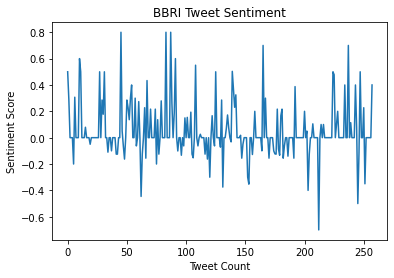

In [ ]:
import matplotlib.pyplot as plt
plt.plot(polar)
plt.title('BBRI Tweet Sentiment')
plt.ylabel('Sentiment Score')
plt.xlabel('Tweet Count')
plt.show()